In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-dataset/Housing.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/housing-price-dataset/Housing.csv')

In [4]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
data.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
# check missing values

missing_values = data.isnull().sum()

In [8]:
missing_values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# check duplicates

duplicates_rows = data[data.duplicated()]

In [10]:
duplicates_rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


No Duplicates and NaN Values

In [11]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Data Visualization

# Identifying trends and patterns in the real estate market, assisting investors, real estate agents, and policymakers in making informed decisions

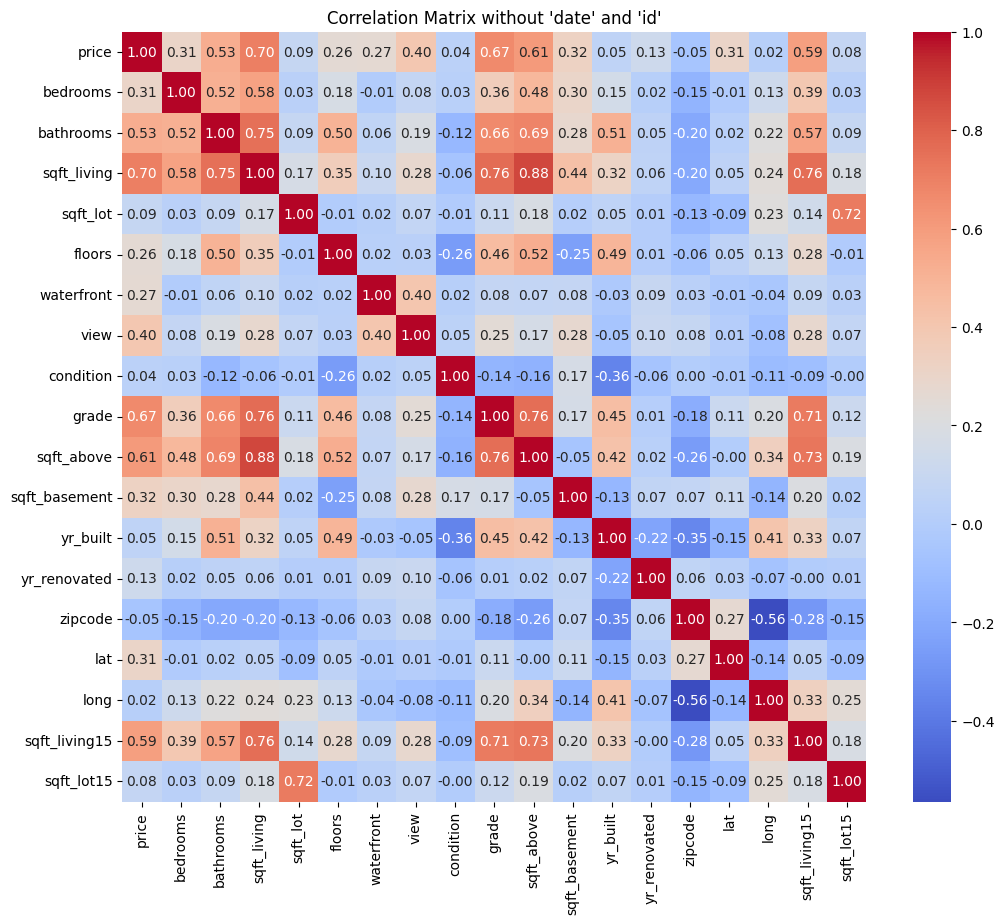

In [12]:
# Dropping 'date' column for correlation analysis as it's not numerical
# And re-calculating correlation matrix
data_numeric = data.drop(['id', 'date'], axis=1)
corr_numeric = data_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_numeric, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix without 'date' and 'id'")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


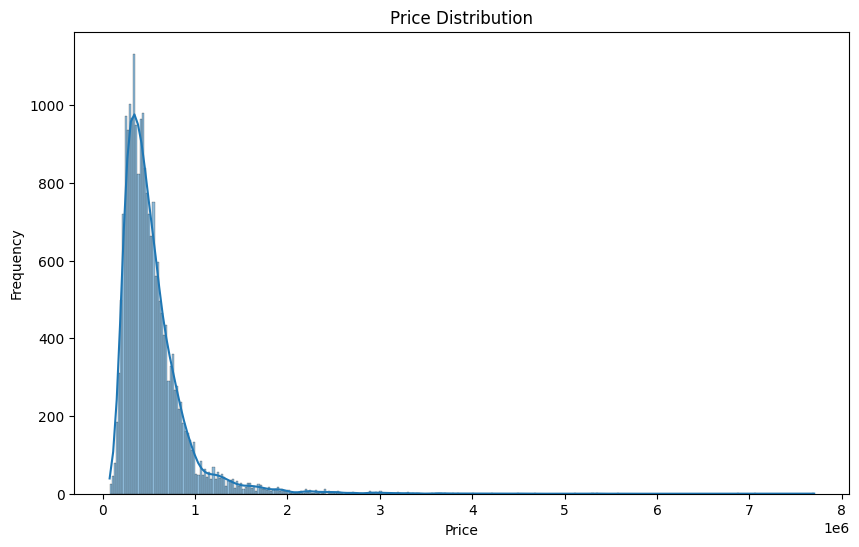

In [13]:
# Price distribution

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

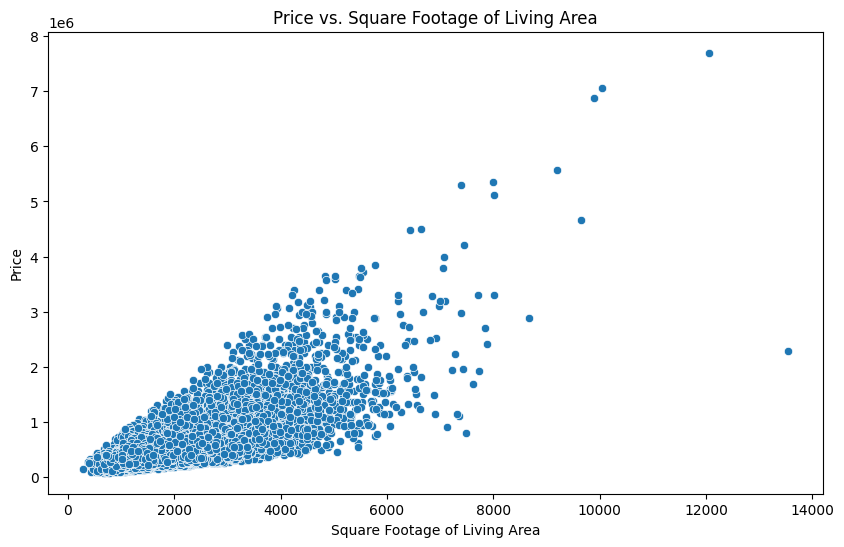

In [14]:
# Relationship between living area and price

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=data)
plt.title('Price vs. Square Footage of Living Area')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.show()

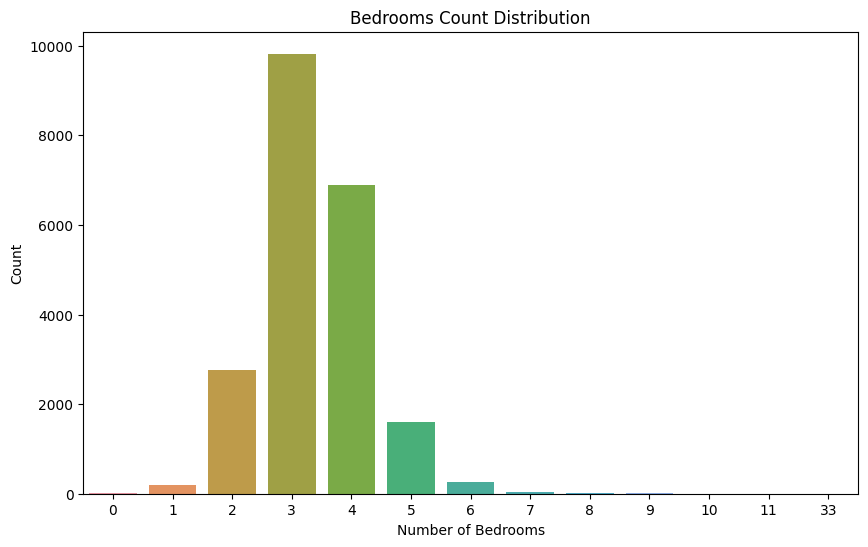

In [15]:
# Bedrooms count distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=data)
plt.title('Bedrooms Count Distribution')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

# The analysis has provided insights into the real estate market data through various visualizations and statistics:

- The correlation matrix indicates that `price` has a strong positive correlation with `sqft_living`, `grade`, `sqft_above`, and `sqft_living15`, suggesting that larger and higher-quality homes tend to have higher prices.

- The price distribution shows a right-skewed distribution, indicating that most homes are in the lower price range, with a few homes priced significantly higher.

- The scatter plot of price vs. square footage of living area** demonstrates a positive relationship, indicating that as the living area increases, the price of the home tends to increase as well.

- The bedrooms count distribution shows that 3-bedroom homes are the most common, followed by 4-bedroom homes, suggesting a preference or higher availability for homes with these bedroom counts in the market.

# Predictive modeling to forecast property prices based on features such as location, amenities, and condition.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
X = data_numeric.drop('price', axis=1)
y = data_numeric['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating and printing the model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
{'mse': mse, 'r2': r2}

{'mse': 45173027114.563675, 'r2': 0.7011905706891381}

* The predictive modeling using Linear Regression resulted in a mean squared error (MSE) of approximately 45,173,027,114.56 and an R^2 score of 0.70, indicating that the model explains 70% of the variance in the housing prices

# Recommendation systems for homebuyers, guiding them towards properties that align with their preferences and requirements

In [17]:
def recommend_properties(budget, bedrooms, bathrooms, min_sqft_living):
    """
    Recommend properties based on the buyer's budget, number of bedrooms, bathrooms, and minimum square footage.
    
    Parameters:
    - budget: Maximum price the buyer is willing to pay.
    - bedrooms: Desired number of bedrooms.
    - bathrooms: Desired number of bathrooms.
    - min_sqft_living: Minimum square footage of the living area.
    
    Returns:
    A DataFrame of recommended properties sorted by price.
    """
    recommended = data[
        (data['price'] <= budget) &
        (data['bedrooms'] == bedrooms) &
        (data['bathrooms'] == bathrooms) &
        (data['sqft_living'] >= min_sqft_living)
    ].sort_values(by='price', ascending=True)
    
    return recommended

# Example usage: Recommend properties with a budget of $600,000, 3 bedrooms, 2 bathrooms, and at least 1500 sqft living area.
recommend_properties(budget=600000, bedrooms=3, bathrooms=2, min_sqft_living=1500)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4312,4331000265,20140926T000000,167000.0,3,2.0,1520,7456,1.0,0,0,...,7,1520,0,1949,0,98166,47.4745,-122.343,1740,8464
16087,5198600010,20140819T000000,180000.0,3,2.0,1670,7056,1.0,0,0,...,7,1670,0,1958,0,98002,47.3139,-122.212,1330,8415
1691,3356406510,20140530T000000,196440.0,3,2.0,1560,7352,1.0,0,0,...,6,1560,0,1992,0,98001,47.2804,-122.251,1120,7950
12241,7682200320,20150409T000000,197400.0,3,2.0,1610,7575,1.0,0,0,...,7,1110,500,1965,0,98003,47.3340,-122.300,1920,8400
16228,6131600255,20141222T000000,202500.0,3,2.0,1540,8316,1.0,0,0,...,6,1540,0,1954,0,98002,47.3230,-122.216,1250,8316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17146,7960100050,20150415T000000,590000.0,3,2.0,1860,3600,1.5,0,0,...,7,1110,750,1915,0,98122,47.6102,-122.296,1680,3695
6460,3300760020,20140826T000000,595000.0,3,2.0,1530,6773,1.0,0,0,...,8,1530,0,1984,0,98033,47.6653,-122.194,2240,7201
653,2324039036,20150403T000000,597500.0,3,2.0,2150,5400,1.5,0,0,...,7,1380,770,1911,0,98126,47.5550,-122.379,1940,6500
17683,1786830090,20140708T000000,599000.0,3,2.0,2560,14680,1.0,0,0,...,8,1330,1230,1987,0,98052,47.6480,-122.118,2390,13848
